In [2]:
import pathlib

import numpy as np
import scipy
import matplotlib.pyplot as plt
import polars as pl


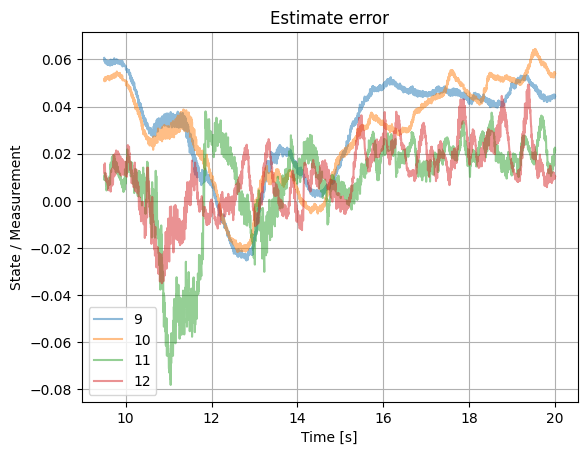

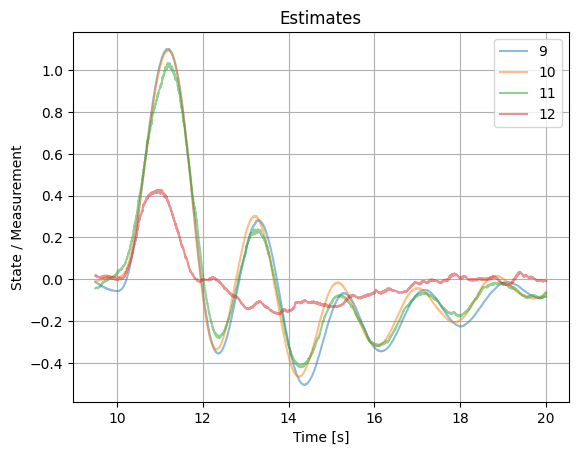

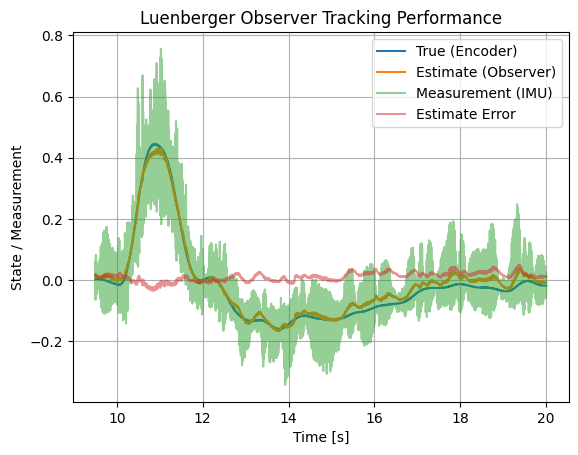

In [37]:
def load_from_mat(
    file_path: str, start_time: float = 0, end_time: float = float("inf")
) -> pl.DataFrame:
    mat = scipy.io.loadmat(file_path)
    ts = mat["ans"]

    df = pl.DataFrame(
        {
            "time": ts[0, :],
            "travel": ts[1, :],
            "travel_rate": ts[2, :],
            "pitch": ts[3, :],
            "pitch_rate": ts[4, :],
            "elevation": ts[5, :],
            "elevation_rate": ts[6, :],
            "joystick_x": ts[7, :],
            "joystick_y": ts[8, :],
            "imu_pitch": ts[9, :],
            "imu_pitch_rate": ts[10, :],
            "imu_elevation": ts[11, :],
            "imu_elevation_rate": ts[12, :],
            "imu_travel": ts[13, :],
            "est_pitch": ts[14, :],
            "est_pitch_rate": ts[15, :],
            "est_elevation": ts[16, :],
            "est_elevation_rate": ts[17, :],
            "est_travel": ts[18, :],
        }
    )

    df = df.with_columns(
        pl.when((pl.col("time") >= 10) & (pl.col("time") <= 11))
        .then(1)
        .otherwise(0)
        .alias("disturbance"),
        pl.col("elevation_rate").rolling_mean(window_size=75).alias("elevation_roll"),
    )

    return df.filter((pl.col("time") >= start_time) & (pl.col("time") <= end_time))


start_time = 9.5
end_time = 20

filename = "data/3_luenberger/{}.mat"

data_9 = load_from_mat(filename.format(9), start_time, end_time)
data_10 = load_from_mat(filename.format(10), start_time, end_time)
data_11 = load_from_mat(filename.format(11), start_time, end_time)
data_12 = load_from_mat(filename.format(12), start_time, end_time)


plt.figure()
plt.plot(data_9["time"], data_9["est_pitch"] - data_9["pitch"], label="9", alpha=0.5)
plt.plot(
    data_10["time"], data_10["est_pitch"] - data_10["pitch"], label="10", alpha=0.5
)
plt.plot(
    data_11["time"], data_11["est_pitch"] - data_11["pitch"], label="11", alpha=0.5
)
plt.plot(
    data_12["time"], data_12["est_pitch"] - data_12["pitch"], label="12", alpha=0.5
)
plt.xlabel("Time [s]")
plt.ylabel("State / Measurement")
plt.grid(True)
plt.legend()
plt.title("Estimate error")
plt.show()


plt.figure()
plt.plot(data_9["time"], data_9["est_pitch"], label="9", alpha=0.5)
plt.plot(data_10["time"], data_10["est_pitch"], label="10", alpha=0.5)
plt.plot(data_11["time"], data_11["est_pitch"], label="11", alpha=0.5)
plt.plot(data_12["time"], data_12["est_pitch"], label="12", alpha=0.5)
plt.xlabel("Time [s]")
plt.ylabel("State / Measurement")
plt.grid(True)
plt.legend()
plt.title("Estimates")
plt.show()


plt.figure()
data = data_12
plt.plot(data["time"], data["pitch"], label="True (Encoder)")
plt.plot(data["time"], data["est_pitch"], label="Estimate (Observer)")
plt.plot(data["time"], data["imu_pitch"], label="Measurement (IMU)", alpha=0.5)
plt.plot(
    data["time"],
    data["est_pitch"] - data["pitch"],
    label="Estimate Error",
    alpha=0.5,
)
plt.xlabel("Time [s]")
plt.ylabel("State / Measurement")
plt.grid(True)
plt.legend()
plt.title("Luenberger Observer Tracking Performance")
plt.show()

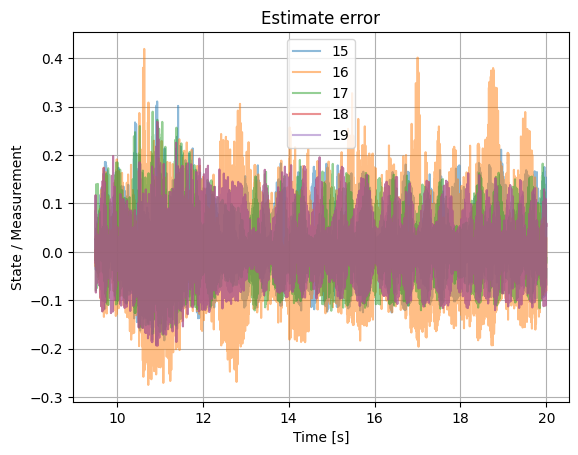

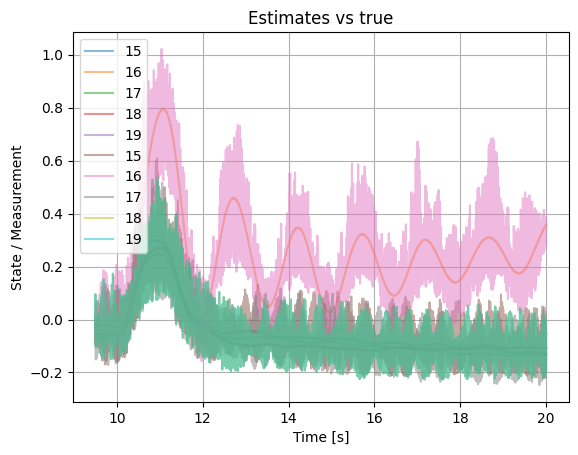

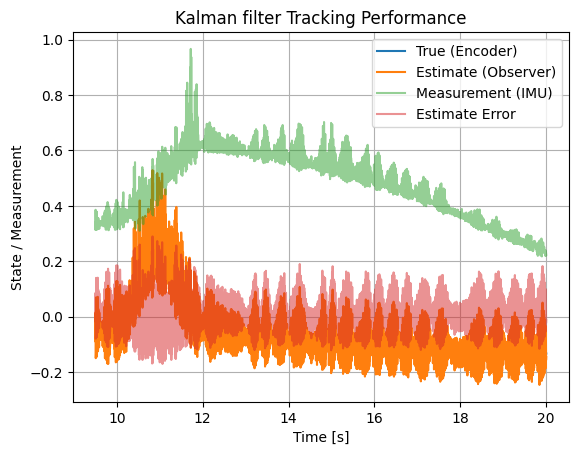

In [43]:
def load_from_mat(
    file_path: str, start_time: float = 0, end_time: float = float("inf")
) -> pl.DataFrame:
    mat = scipy.io.loadmat(file_path)
    ts = mat["ans"]

    df = pl.DataFrame(
        {
            "time": ts[0, :],
            "travel": ts[1, :],
            "travel_rate": ts[2, :],
            "pitch": ts[3, :],
            "pitch_rate": ts[4, :],
            "elevation": ts[5, :],
            "elevation_rate": ts[6, :],
            "joystick_x": ts[7, :],
            "joystick_y": ts[8, :],
            "est_pitch": ts[9, :],
            "est_pitch_rate": ts[10, :],
            "est_elevation": ts[11, :],
            "est_elevation_rate": ts[12, :],
            "est_travel": ts[13, :],
            "imu_pitch": ts[14, :],
            "imu_pitch_rate": ts[15, :],
            "imu_elevation": ts[16, :],
            "imu_elevation_rate": ts[17, :],
            "imu_travel": ts[18, :],
        }
    )

    df = df.with_columns(
        pl.when((pl.col("time") >= 10) & (pl.col("time") <= 11))
        .then(1)
        .otherwise(0)
        .alias("disturbance"),
        pl.col("elevation_rate").rolling_mean(window_size=75).alias("elevation_roll"),
    )

    return df.filter((pl.col("time") >= start_time) & (pl.col("time") <= end_time))


start_time = 9.5
end_time = 20

filename = "data/4_kalman/{}.mat"

data_15 = load_from_mat(filename.format(15), start_time, end_time)
data_16 = load_from_mat(filename.format(16), start_time, end_time)
data_17 = load_from_mat(filename.format(17), start_time, end_time)
data_18 = load_from_mat(filename.format(18), start_time, end_time)
data_19 = load_from_mat(filename.format(18), start_time, end_time)


plt.figure()
plt.plot(
    data_15["time"], data_15["est_pitch"] - data_15["pitch"], label="15", alpha=0.5
)
plt.plot(
    data_16["time"], data_16["est_pitch"] - data_16["pitch"], label="16", alpha=0.5
)
plt.plot(
    data_17["time"], data_17["est_pitch"] - data_17["pitch"], label="17", alpha=0.5
)
plt.plot(
    data_18["time"], data_18["est_pitch"] - data_18["pitch"], label="18", alpha=0.5
)
plt.plot(
    data_19["time"], data_18["est_pitch"] - data_18["pitch"], label="19", alpha=0.5
)
plt.xlabel("Time [s]")
plt.ylabel("State / Measurement")
plt.grid(True)
plt.legend()
plt.title("Estimate error")
plt.show()


plt.figure()
plt.plot(data_15["time"], data_15["pitch"], label="15", alpha=0.5)
plt.plot(data_16["time"], data_16["pitch"], label="16", alpha=0.5)
plt.plot(data_17["time"], data_17["pitch"], label="17", alpha=0.5)
plt.plot(data_18["time"], data_18["pitch"], label="18", alpha=0.5)
plt.plot(data_19["time"], data_19["pitch"], label="19", alpha=0.5)
plt.plot(data_15["time"], data_15["est_pitch"], label="15", alpha=0.5)
plt.plot(data_16["time"], data_16["est_pitch"], label="16", alpha=0.5)
plt.plot(data_17["time"], data_17["est_pitch"], label="17", alpha=0.5)
plt.plot(data_18["time"], data_18["est_pitch"], label="18", alpha=0.5)
plt.plot(data_19["time"], data_19["est_pitch"], label="19", alpha=0.5)
plt.xlabel("Time [s]")
plt.ylabel("State / Measurement")
plt.grid(True)
plt.legend()
plt.title("Estimates vs true")
plt.show()


plt.figure()
data = data_17
plt.plot(data["time"], data["pitch"], label="True (Encoder)")
plt.plot(data["time"], data["est_pitch"], label="Estimate (Observer)")
plt.plot(data["time"], data["imu_pitch"], label="Measurement (IMU)", alpha=0.5)
plt.plot(
    data["time"],
    data["est_pitch"] - data["pitch"],
    label="Estimate Error",
    alpha=0.5,
)
plt.xlabel("Time [s]")
plt.ylabel("State / Measurement")
plt.grid(True)
plt.legend()
plt.title("Kalman filter Tracking Performance")
plt.show()